In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [121]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\poly.csv")
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


In [122]:
X = df[['x']].values
y = df.y.values

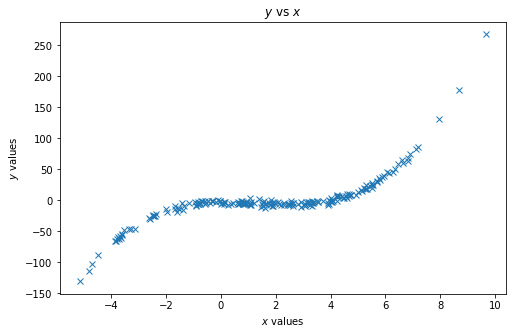

In [123]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$')
plt.show()

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=22)

In [125]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_lin_pred = lreg.predict(X_test)
R2_score = lreg.score(X_test,y_test)
print(f"{'Linear R2 Score':>15}: {R2_score:>5.4f}")

Linear R2 Score: 0.5352


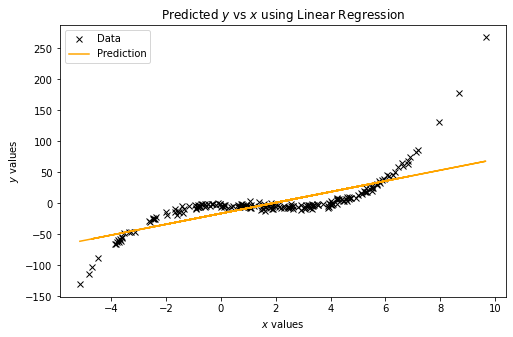

In [126]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X,y,'kx',label="Data")
ax.plot(X_test,y_lin_pred,ls='-',c='orange', label="Prediction")
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('Predicted $y$ vs $x$ using Linear Regression')
plt.legend()
plt.show()

## Polynomial Regression

In [127]:
n=3
poly = PolynomialFeatures(degree=n, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test= poly.fit_transform(X_test)
lreg2 = LinearRegression()
lreg2.fit(X_poly_train,y_train)
y_poly_pred = lreg2.predict(X_poly_test)
R2_poly_score = lreg2.score(X_poly_test,y_test)
print(f"{'Polynomial R2 Score':>20}: {R2_poly_score:>5.4f}")

 Polynomial R2 Score: 0.9976


In [128]:
idx = np.argsort(X_test[:,0])
X_test = X_test[idx]
y_test = y_test[idx]
y_lin_pred = y_lin_pred[idx]
y_poly_pred = y_poly_pred[idx]


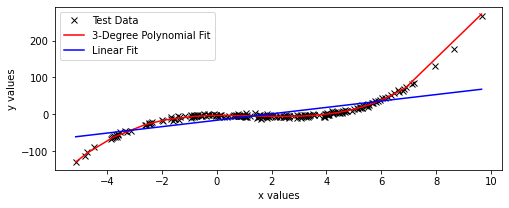

In [129]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(X, y, 'kx', label="Test Data")
ax.plot(X_test, y_poly_pred, ls='-',c='red', label=f"{n}-Degree Polynomial Fit")
ax.plot(X_test, y_lin_pred, ls='-',c='blue', label='Linear Fit')
ax.set_xlabel("x values")
ax.set_ylabel("y values")
plt.legend()
plt.show()